In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from SGM import *

if not os.path.exists('result'):
    os.makedirs('result')

# 1. The first example

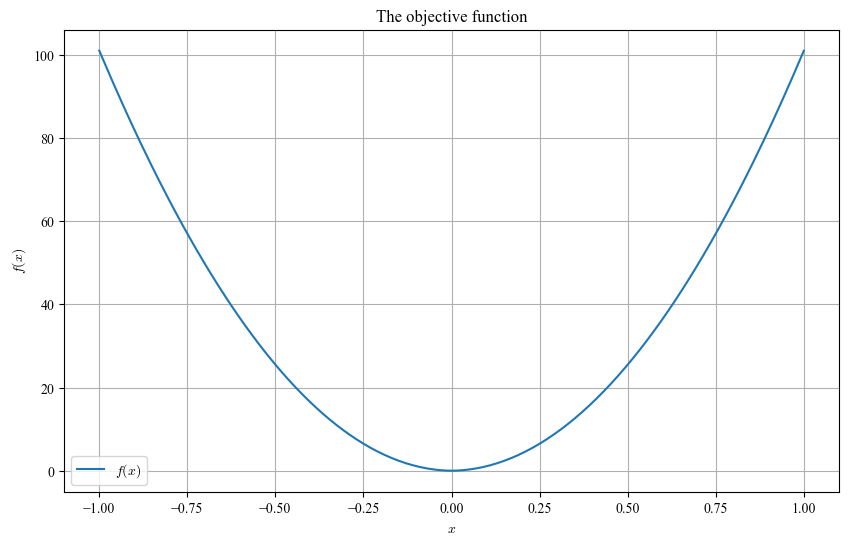

In [2]:
x_start = -1.0
x_end = 1.0
x_0 = 0.995
gamma = 0.005
eta = 1e-6
h = 1e-6

# Objective Function
def f(x):
    return np.sum([np.abs(x - i/100) + np.abs(x + i/100) - 2*i/100 for i in range(99)])

# Generate X values
X = np.linspace(-1, 1, 500)

# Generate Y values
Y = np.array([f(i) for i in X])

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(X, Y, label='$f(x)$')
plt.title('The objective function')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)
plt.show()

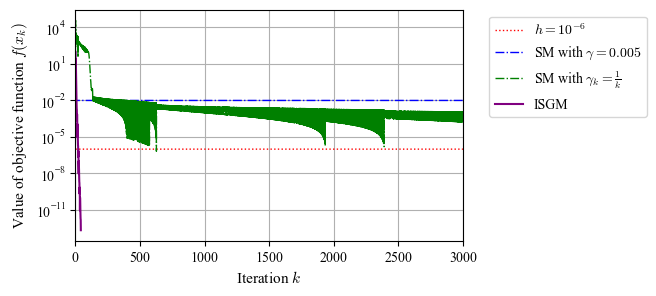

In [3]:
result = VISUALIZATION(objective_function=f, x_start=x_start, x_end=x_end, x_0=x_0, gamma=gamma, eta=eta, N=3001, h=h, filename='result/first_example')

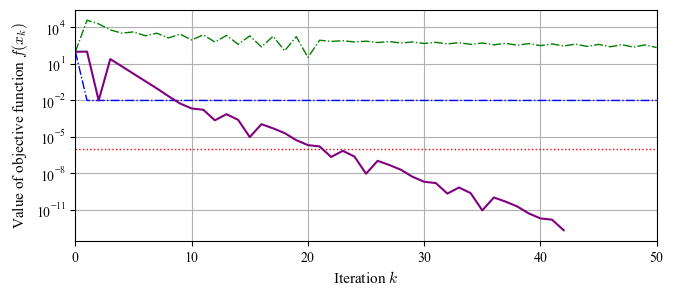

In [4]:
result_zoomed = VISUALIZATION(objective_function=f, x_start=x_start, x_end=x_end, x_0=x_0, gamma=gamma, eta=eta, N=51, h=h, figure_size=(7.5, 3), filename='result/first_example_zoomed', legend=False)

In [5]:
image1_path = 'result/first_example.png'
image2_path = 'result/first_example_zoomed.png'
output_path = 'result/first_example_combined.png'

combine_images_vertically(image1_path, image2_path, output_path)

# 2. The second example

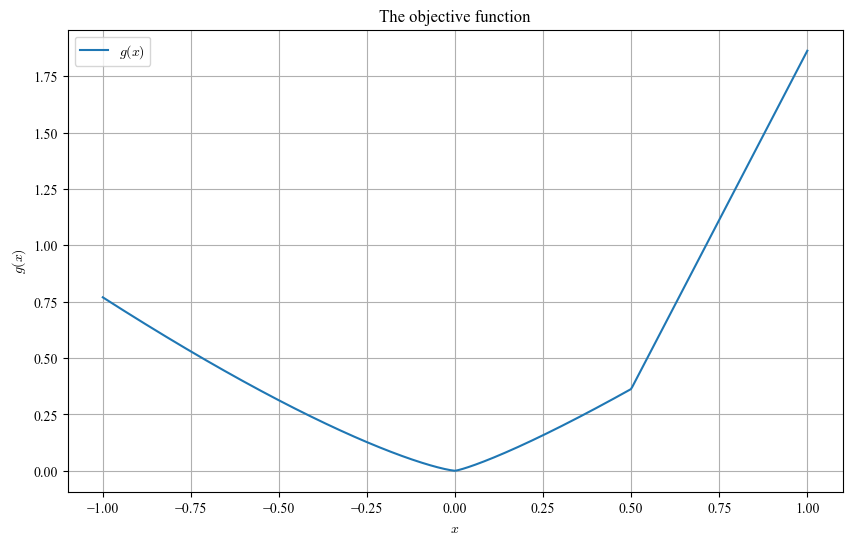

In [6]:
x_start = -1.0
x_end = 1.0
x_0 = 0.995
gamma = 0.005
eta = 1e-6
h = 1e-6
p = 1.3
q = 1.2

# Objective Function
def g(x):
    if x >= 0.5:
        return 3*(x - 0.5) + (0.5**q)/q
    elif 0 <= x < 0.5:
        return (np.abs(x)**q)/q
    else:
        return (np.abs(x)**p)/p


# Generate X values
X = np.linspace(-1, 1, 500)

# Generate Y values
Y = np.array([g(i) for i in X])

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(X, Y, label='$g(x)$')
plt.title('The objective function')
plt.xlabel('$x$')
plt.ylabel('$g(x)$')
plt.legend()
plt.grid(True)
plt.show()

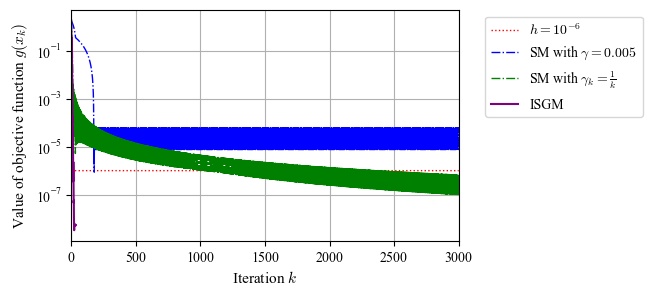

In [7]:
result = VISUALIZATION(objective_function=g, x_start=x_start, x_end=x_end, x_0=x_0, gamma=gamma, eta=eta, N=3001, h=h, filename='result/second_example', functionname='g')

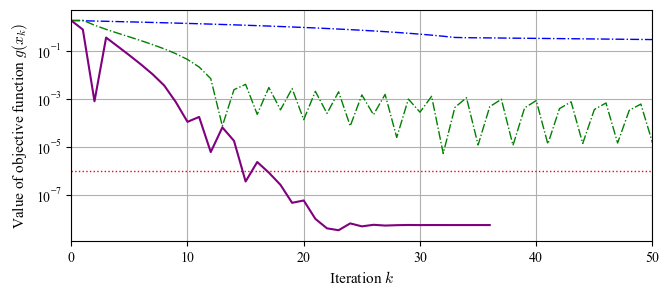

In [8]:
result_zoomed = VISUALIZATION(objective_function=g, x_start=x_start, x_end=x_end, x_0=x_0, gamma=gamma, eta=eta, N=51, h=h, figure_size=(7.5, 3), filename='result/second_example_zoomed', legend=False, functionname='g')

In [9]:
image1_path = 'result/second_example.png'
image2_path = 'result/second_example_zoomed.png'
output_path = 'result/second_example_combined.png'

combine_images_vertically(image1_path, image2_path, output_path)

# Unrepresented examples

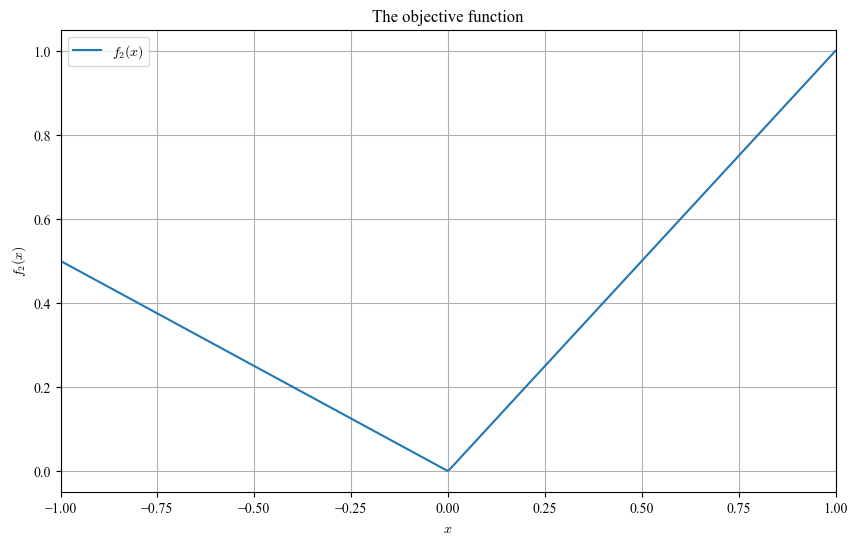

In [10]:
x_start = -1.0
x_end = 1.0
x_0 = 0.995
gamma = 0.005
eta = 1e-6
h = 1e-6

# Objective Function
def f2(x):
    if x >= 0:
        return x
    else:
        return -(x/2)

# Generate X values
X = np.linspace(-1, 1, 500)

# Generate Y values
Y = np.array([f2(i) for i in X])

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(X, Y, label='$f_2(x)$')
plt.title('The objective function')
plt.xlabel('$x$')
plt.ylabel('$f_2(x)$')
plt.legend()
plt.xlim(min(X), max(X))
plt.grid(True)
plt.show()

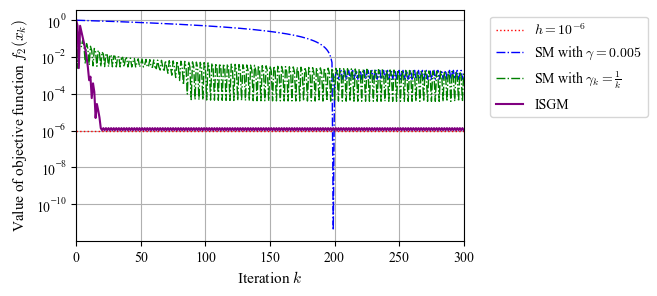

In [11]:
result = VISUALIZATION(objective_function=f2, x_start=x_start, x_end=x_end, x_0=x_0, gamma=gamma, eta=eta, N=301, h=h, filename='result/omitted_example1', functionname='f_2')

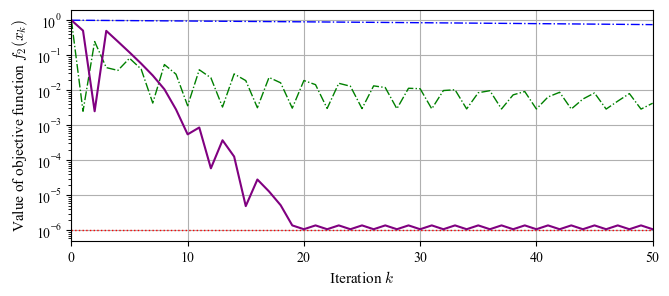

In [12]:
result_zoomed = VISUALIZATION(objective_function=f2, x_start=x_start, x_end=x_end, x_0=x_0, gamma=gamma, eta=eta, N=51, h=h, figure_size=(7.5, 3), filename='result/omitted_example1_zoomed', legend=False, functionname='f_2')

In [13]:
image1_path = 'result/omitted_example1.png'
image2_path = 'result/omitted_example1_zoomed.png'
output_path = 'result/omitted_example1_combined.png'

combine_images_vertically(image1_path, image2_path, output_path)

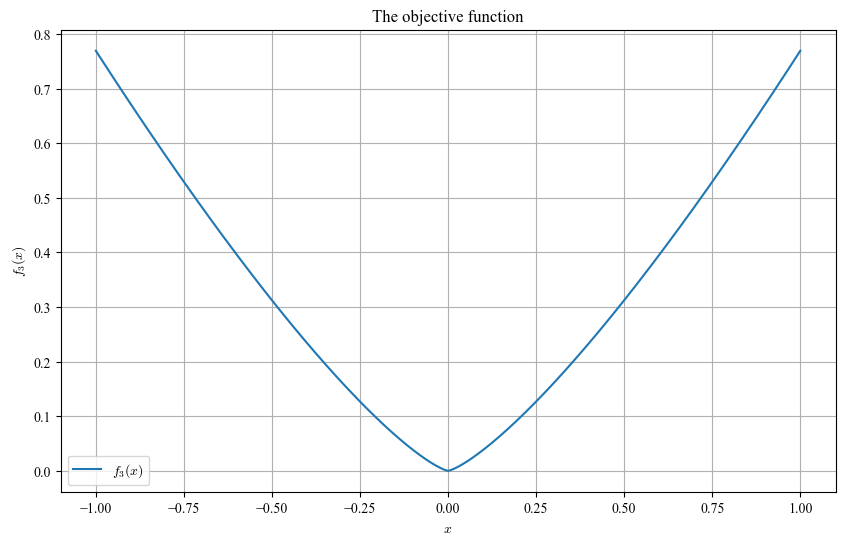

In [14]:
x_start = -1.0
x_end = 1.0
x_0 = 0.995
gamma = 0.005
eta = 1e-6
h = 1e-6
p = 1.3

# Objective Function
def f3(x):
    return (np.abs(x)**p)/p

# Generate X values
X = np.linspace(-1, 1, 500)

# Generate Y values
Y = np.array([f3(i) for i in X])

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(X, Y, label='$f_3(x)$')
plt.title('The objective function')
plt.xlabel('$x$')
plt.ylabel('$f_3(x)$')
plt.legend()
plt.grid(True)
plt.show()

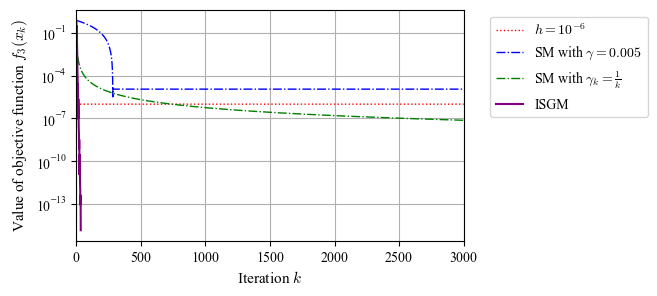

In [15]:
result3 = VISUALIZATION(objective_function=f3, x_start=x_start, x_end=x_end, x_0=x_0, gamma=gamma, eta=eta, N=3001, h=h, filename='result/omitted_example2', functionname='f_3')

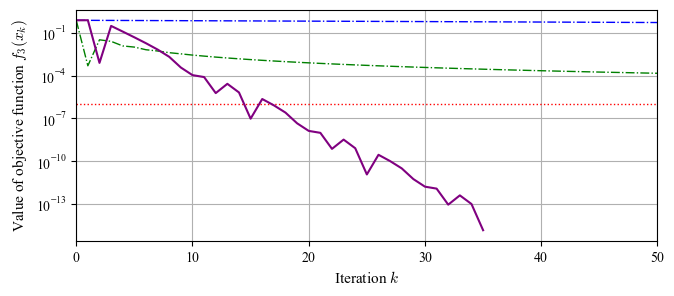

In [16]:
result3_zoomed = VISUALIZATION(objective_function=f3, x_start=x_start, x_end=x_end, x_0=x_0, gamma=gamma, eta=eta, N=51, h=h, figure_size=(7.5, 3), filename='result/omitted_example2_zoomed', legend=False, functionname='f_3')

In [17]:
image1_path = 'result/omitted_example2.png'
image2_path = 'result/omitted_example2_zoomed.png'
output_path = 'result/omitted_example2_combined.png'

combine_images_vertically(image1_path, image2_path, output_path)